Enter the line voltage(in volts) :420
Enter the Number of subconductors in buldle :2
Enter the diameter of a subconductor in bundle(in cm) :3.18
Enter the bundle spacing(in meter) :0.4572


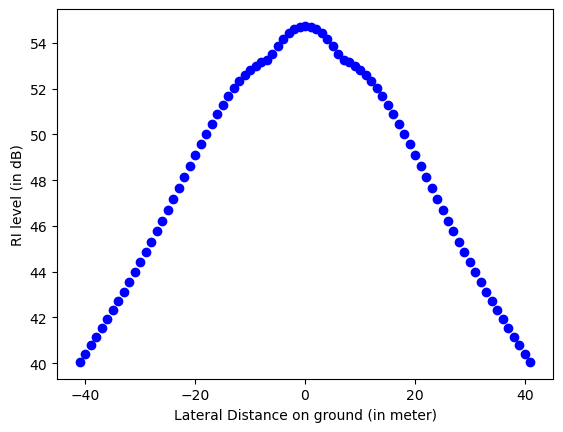

In [6]:
import math
import numpy
import numpy as np
import matplotlib.pyplot as plt
lcs=np.array([[-11,14],[0,14],[11,14]])


V = float(input("Enter the line voltage(in volts) :"))
N = int(input("Enter the Number of subconductors in buldle :"))
d = float(input("Enter the diameter of a subconductor in bundle(in cm) :"))
r = float(d/2)
B = float(input("Enter the bundle spacing(in meter) :"))
R = float(B/math.sin(math.pi/N))
S = float(11)
Req = float(pow((N*r*pow(R,N-1)),1/N))
H = float(14)

#C = float((1+5*((H/S)**2)+4*((H/S)**4))**(1/4))

#print("Voltage gradient for outer phase lines(1st and 3rd line) : ")
#Eom = float(((R+(N-1)*r)*V)/(N*r*R*1.73205*math.log(2*H/(Req*C))))

mpcs = np.empty(83, dtype=float)


for j in range(83):
    mpcs[j]= -41+j
    
data = np.empty(83, dtype=float)

for j in range(83):

    D=np.array([0,0,0], dtype=float)

    for i in range(3):
        D[i]= float((((mpcs[j]-lcs[i][0])**2)+((0-lcs[i][1])**2))**(1/2))

    Eo=np.array([16.2,17.3,16.2], dtype=float)
    
    RI=np.array([0,0,0], dtype=float)

    for i in range(3):
        RI[i]=3.5*Eo[i]+6*d-33*math.log10(D[i]/20)-30
    
    RI.sort()
    
    RI_T = float(0)

    if(RI[2]>=(RI[1]+3)):
        RI_T=RI[2]
    else:
        RI_T= ((RI[1]+RI[2])/2)+1.5
        
    data[j]=RI_T

plt.xlabel('Lateral Distance on ground (in meter)')
plt.ylabel('RI level (in dB)')
plt.plot(mpcs, data,'bo')
plt.show()
    